In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats


In [5]:
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )
np.random.seed(1425)

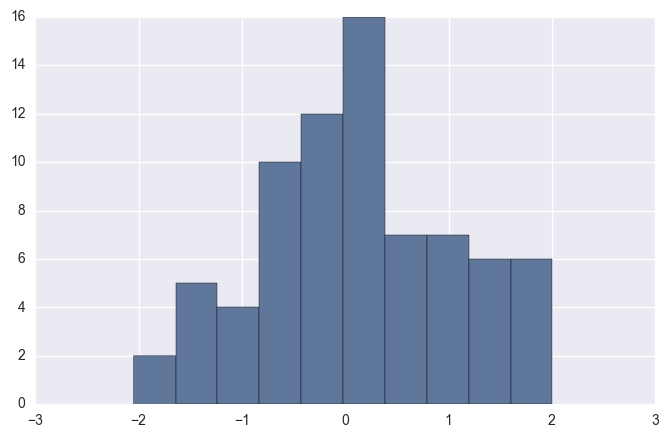

In [6]:
data = randn(75)
plt.hist(data)
plt.show()

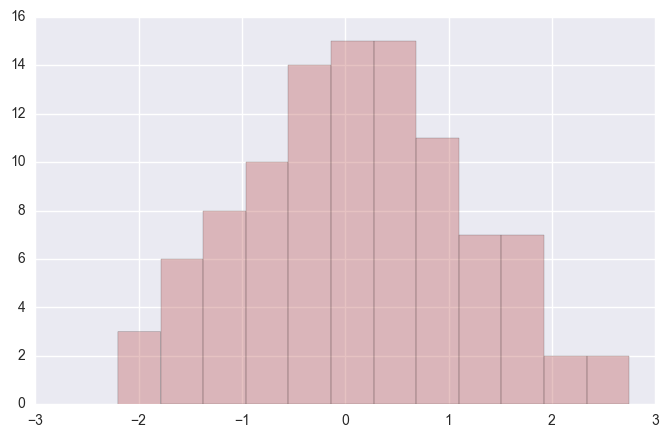

In [5]:
data = randn(100)
plt.hist(data, bins=12, color=sns.desaturate("indianred", .8), alpha=.4)
plt.show()

In [6]:
data1 = stats.poisson(2).rvs(100)
data2 = stats.poisson(5).rvs(500)
type(data1)

numpy.ndarray

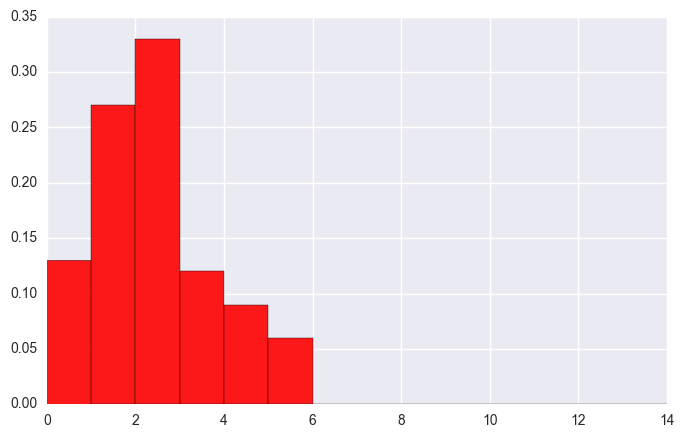

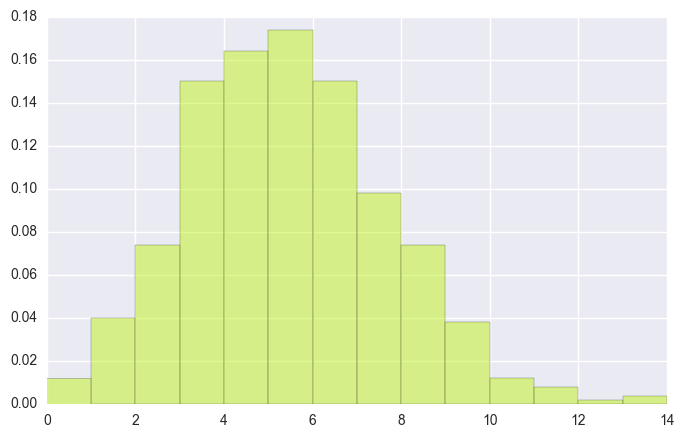

In [7]:
max_data = np.r_[data1, data2].max()
bins = np.linspace(0, max_data, max_data+1)
#plt.hist(data1) # 
# 首先将2个图形分别画到figure中
plt.hist(data1, bins, normed=True, color="#FF0000", alpha=.9)
plt.figure()
plt.hist(data2, bins, normed=True, color="#C1F320", alpha=.5)
plt.show()

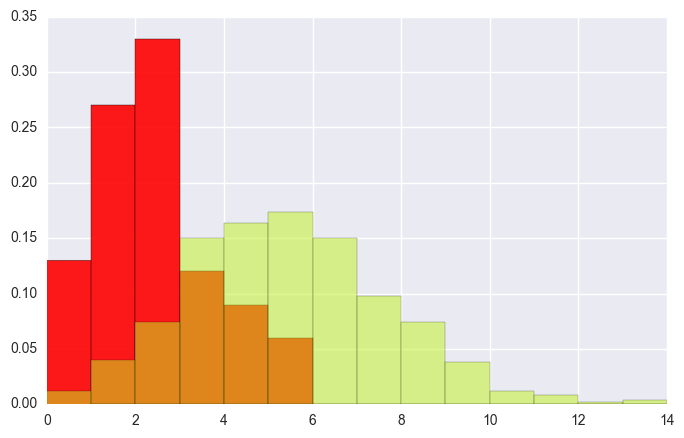

In [8]:
plt.hist(data1, bins, normed=True, color="#FF0000", alpha=.9)
plt.hist(data2, bins, normed=True, color="#C1F320", alpha=.5)
plt.show()

In [9]:
x = stats.gamma(3).rvs(5000);

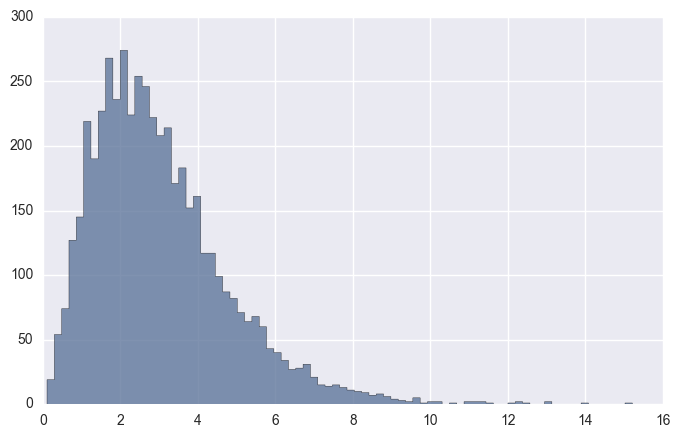

In [10]:
plt.hist(x, bins=80, histtype="stepfilled", alpha=.8)
plt.show()

In [11]:
x = stats.gamma(2).rvs(5000)
y = stats.gamma(50).rvs(5000)
with sns.axes_style("dark"):
    sns.jointplot(x, y, kind="hex")

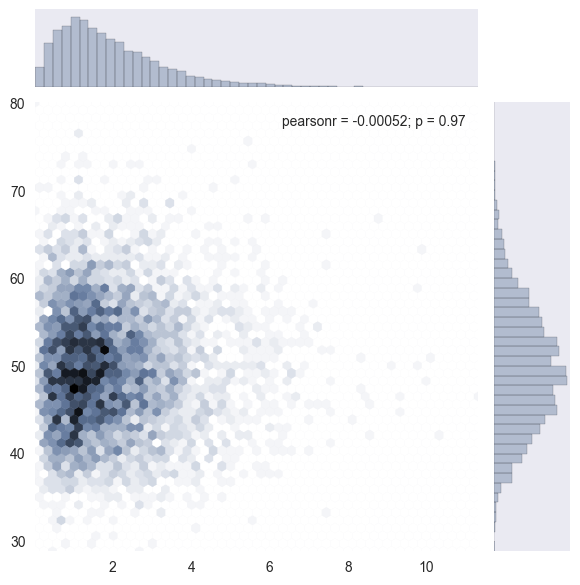

In [27]:
plt.show()

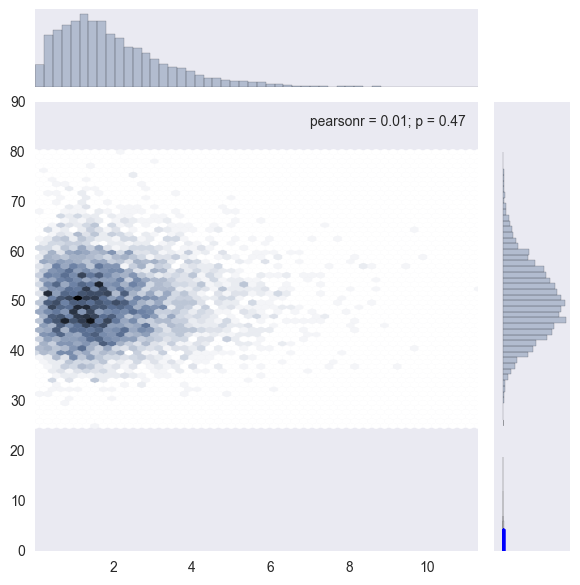

In [12]:
data = randn(80)
plt.hist(data, alpha=0.3, color='#ffffff')
sns.rugplot(data)
plt.show()

In [13]:
sns.rugplot(data, color='indianred')
xx = np.linspace(-4, 4, 100)
# 计算bandwidth
bandwidth = ( ( 4*data.std() ** 5)/(3 *len(data))) ** .2
bandwidth = len(data) ** (-1. /5)

In [14]:
kernels = []
for d in data:
	# basis function as a gaussian PDF
	kernel = stats.norm(d, bandwidth).pdf(xx)
	kernels.append(kernel)
	# Scale for plotting
	kernel /= kernel.max()
	kernel *= .4
	plt.plot(xx, kernel, "#888888", alpha=.18)
plt.ylim(0, 1)

(0, 1)

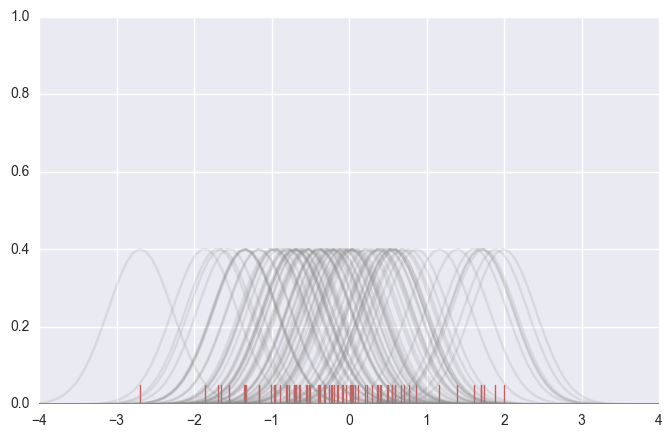

In [15]:
plt.show()

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

In [17]:
c1, c2 = sns.color_palette("husl", 3)[:2]

In [18]:
summed_kde = np.sum(kernels, axis=0)
ax1.plot(xx, summed_kde, c=c1)
sns.rugplot(data, c=c1, ax=ax1)
ax1.set_title("summed basis function")
# density estimate
scipy_kde = stats.gaussian_kde(data)(xx)
ax2.plot(xx, scipy_kde, c=c2)
sns.rugplot(data, c=c2, ax=ax2)
ax2.set_yticks([]) # no ticks of y
ax2.set_title("scipy gaussian_kde")
f.tight_layout()

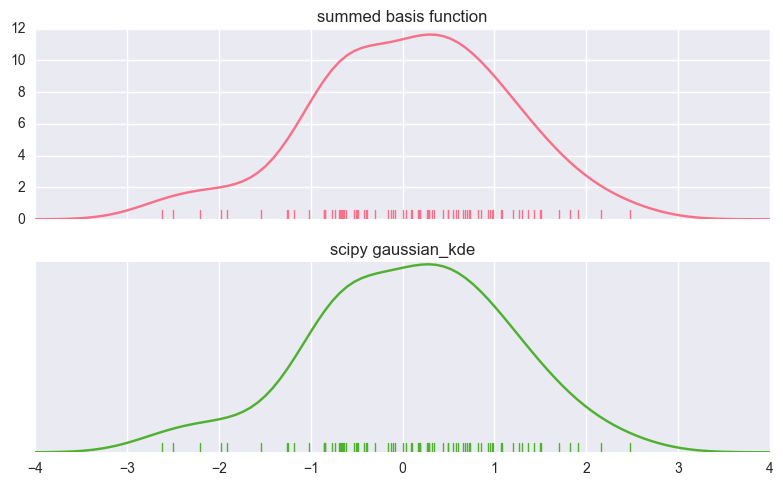

In [38]:
plt.show()

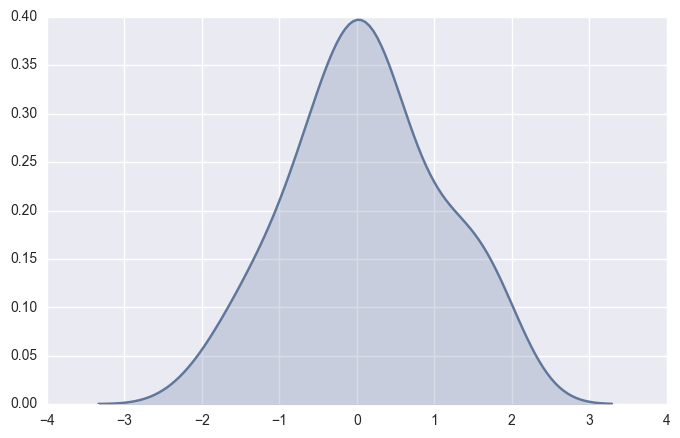

In [7]:
sns.kdeplot(data, shade=True)
plt.show()

In [21]:
pal = sns.blend_palette([sns.desaturate("royalblue", 0), "royalblue"], 5)
bws = [.1, .25, .5, 1, 2]
for bw, c in zip(bws, pal):
	sns.kdeplot(data, bw=bw, color=c, lw=1.8, label=bw)
plt.legend(title="kernel bandwidth value")
sns.rugplot(data, color="#CF3512")
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

C:\Users\Aramis\Anaconda3\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
C:\Users\Aramis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


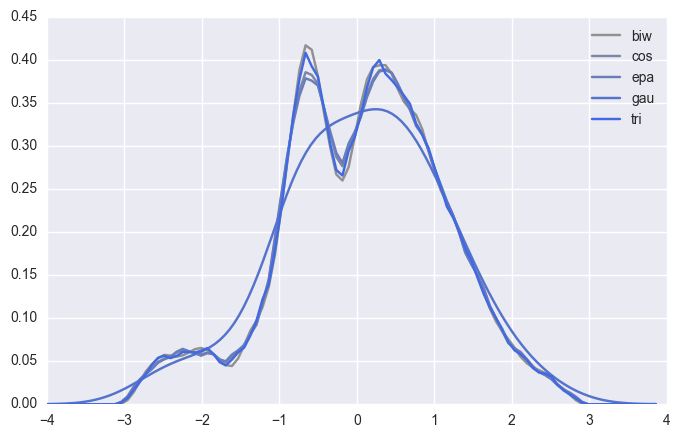

In [42]:
kernels = ["biw", "cos", "epa", "gau", "tri", "triw"]
for k, c in  zip(kernels, pal):
	sns.kdeplot(data, kernel=k, color=c, label=k)
plt.legend()
plt.show()

C:\Users\Aramis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


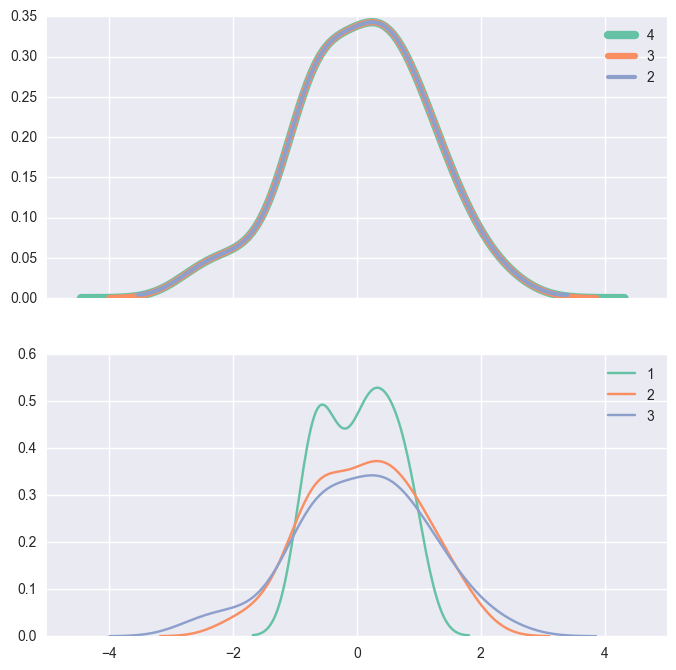

In [46]:
with sns.color_palette('Set2'):
	f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
	for cut in[4, 3, 2]:
		sns.kdeplot(data, cut=cut, label=cut, lw=cut*1.5, ax=ax1)
	for clip in[1, 2, 3]:
		sns.kdeplot(data, clip=(-clip, clip), label=clip, ax=ax2)
plt.show()

C:\Users\Aramis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


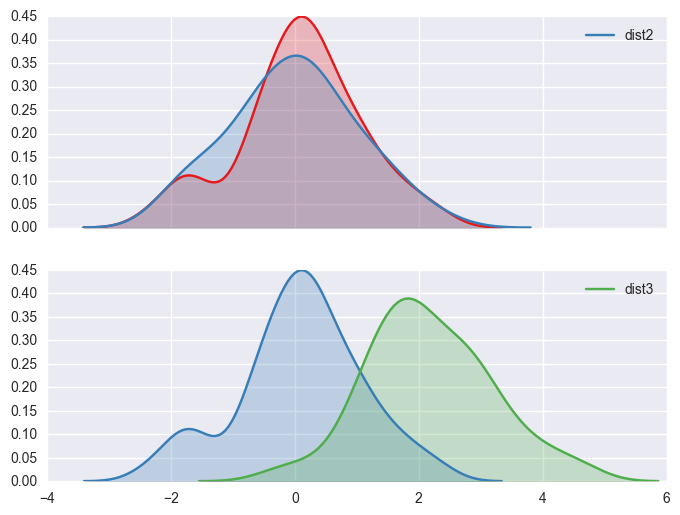

In [59]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
dist1, dist2, dist3 = stats.norm(0, 1).rvs((3, 100))
dist3 = pd.Series(dist3 + 2, name='dist3')
sns.kdeplot(dist1, shade=True, color=c1, ax=ax1)
sns.kdeplot(dist2, shade=True, color=c2, label='dist2', ax=ax1)
sns.kdeplot(dist1, shade=True, color=c2, ax=ax2)
sns.kdeplot(dist3, shade=True, color=c3, ax=ax2)
plt.show()

In [ ]:
with sns.color_palette("Set1"):
    for d, label in zip(data, list("ABC")):
        sns.kdeplot(d, cumulative=True, label=label)

C:\Users\Aramis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


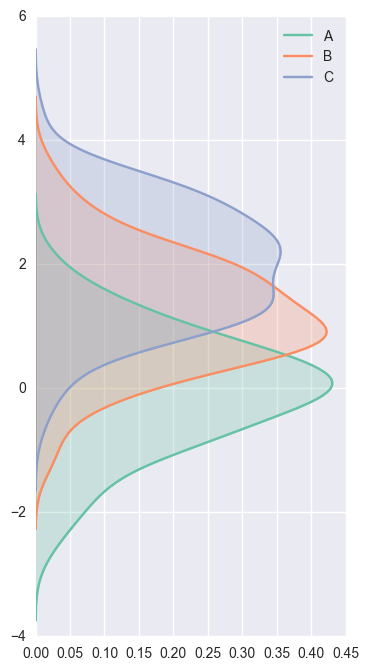

In [63]:
plt.figure(figsize=(4, 8))
data = stats.norm(0, 1).rvs((3, 100)) + np.arange(3)[:, None]

with sns.color_palette("Set2"):
    for d, label in zip(data, list("ABC")):
        sns.kdeplot(d, vertical=True, shade=True, label=label)
plt.show()

In [64]:
data = np.random.multivariate_normal([0, 0], [[1, 2], [2, 20]], size=1000)
data = pd.DataFrame(data, columns=["X", "Y"])
mpl.rc("figure", figsize=(6, 6))

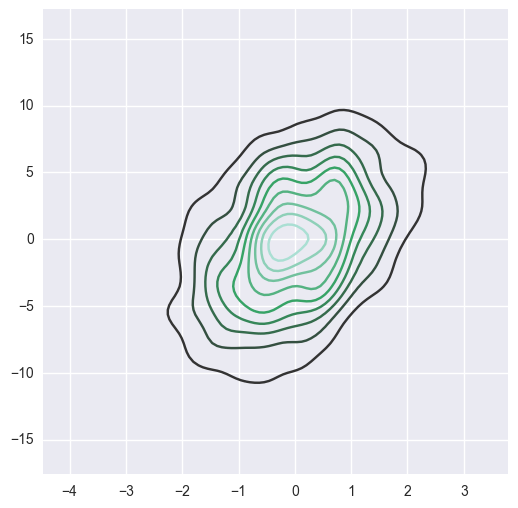

In [65]:
sns.kdeplot(data)
plt.show()

In [66]:
sns.kdeplot(data.X, data.Y, shade=True, bw="silverman", gridsize=50, clip=(-11, 11))

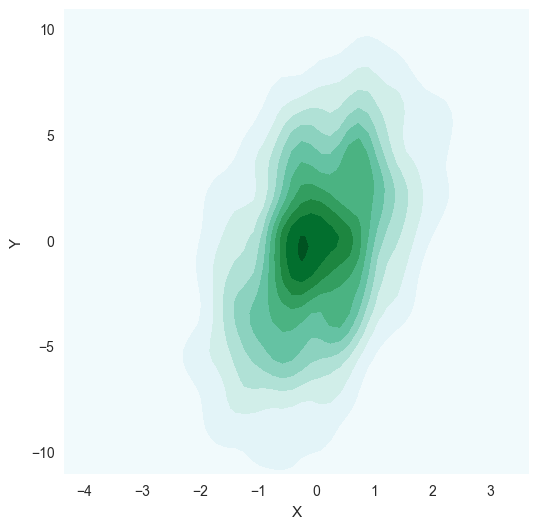

In [67]:
plt.show()

In [68]:
with sns.axes_style('white'):
    sns.jointplot('X', 'Y', data, kind='kde')

C:\Users\Aramis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


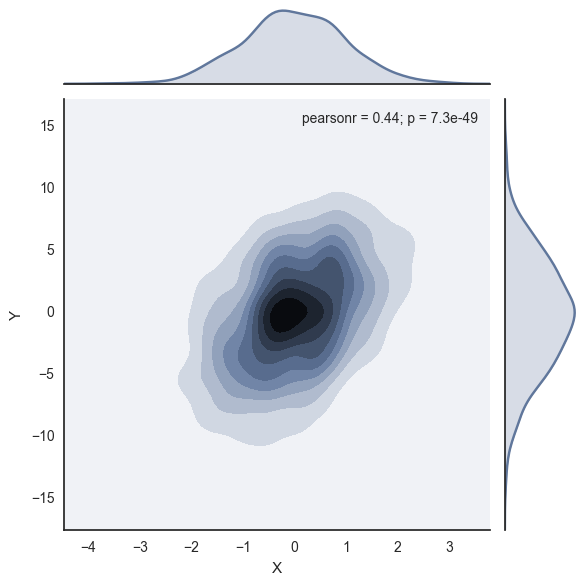

In [69]:
plt.show()

C:\Users\Aramis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


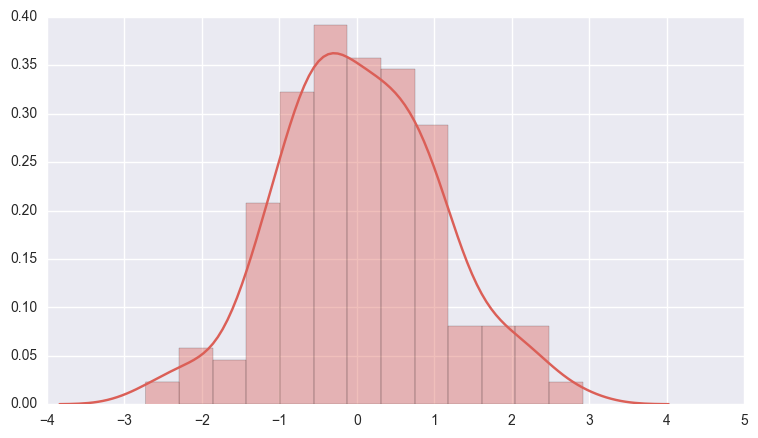

In [70]:
sns.set_palette("hls")
mpl.rc("figure", figsize=(9, 5))
data = randn(200)
sns.distplot(data)
plt.show()

In [71]:
sns.distplot(data, kde=True, rug=True, hist=True)
# 更细致的, 来用各kwargs来指定 (参数的参数dict)
sns.distplot(data, kde_kws={"color": "seagreen", "lw":3, "label" : "KDE" }, 
	hist_kws={"histtype": "stepfilled", "color": "slategray" })

C:\Users\Aramis\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


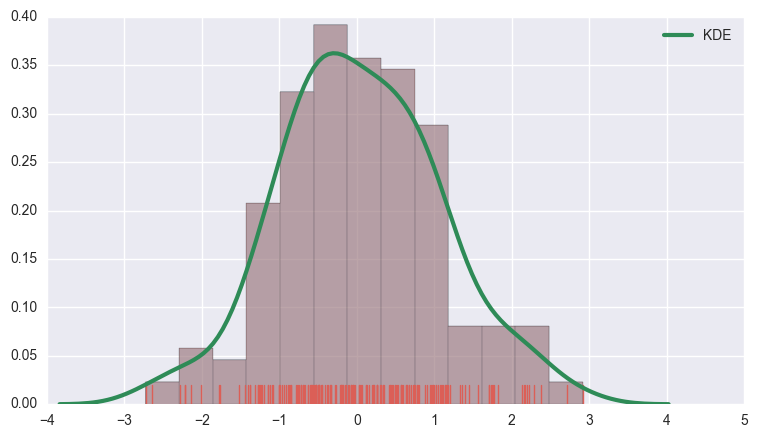

In [72]:
plt.show()

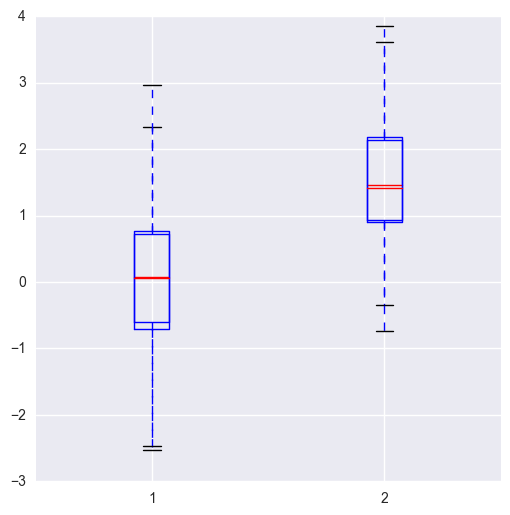

In [74]:
sns.set(rc={"figure.figsize": (6, 6)})
data = [randn(100), randn(120) + 1.5]
plt.boxplot(data)
plt.show()

In [ ]:
sns.boxplot(data)

In [ ]:
sns.boxplot(data, names=['left', 'right'], whis=np.inf, color='indianred')
plt.show()